In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
if __name__ == "__main__" and __package__ is None:
    from sys import path
    from os.path import dirname as dir
    path.append(dir(path[0]))
    __package__ = "examples"
from utils.sentinel_products_utils import get_S2prod_info
from utils.date_utils import get_doy

### User input

In [16]:
products_dir = "/media/michaeltrs/0a8a5a48-ede5-47d0-8eff-10d11350bf98/Satellite_Data/Sentinel2/PSETAE_repl/2017/cloud_0_30"
# "/media/michaeltrs/0a8a5a48-ede5-47d0-8eff-10d11350bf98/Satellite_Data/Sentinel2/PSETAE_repl/2017/cloud_0_70"
ext =  ".zip"  # ".SAFE"  #

### Find products 

If a directory contains yest unzipped products we will parse product info from the filename following the [Sentinel product naming convention](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/naming-convention).

#### Compact Naming Convention

The compact naming convention is arranged as follows:

MMM_MSIXXX_YYYYMMDDHHMMSS_Nxxyy_ROOO_Txxxxx_<Product Discriminator>.ext

The products contain two dates.

The first date (YYYYMMDDHHMMSS) is the datatake sensing time.
The second date is the "<Product Discriminator>" field, which is 15 characters in length, and is used to distinguish between different end user products from the same datatake. Depending on the instance, the time in this field can be earlier or slightly later than the datatake sensing time.

The other components of the filename are:

- MMM: is the mission ID(S2A/S2B)
- MSIXXX: MSIL1C denotes the Level-1C product level/ MSIL2A denotes the Level-2A product level
- YYYYMMDDHHMMSS: the datatake sensing start time
- Nxxyy: the PDGS Processing Baseline number (e.g. N0204)
- ROOO: Relative Orbit number (R001 - R143)
- Txxxxx: Tile Number field
- ext: file extension either zip or SAFE: Product Format (Standard Archive Format for Europe)


In [17]:
filenames = [os.path.basename(fn) for fn in glob("%s/*%s" % (products_dir, ext))]
# print(filenames)
prodinfo = []
for fn in filenames:
    info = fn.split('_')
    year = info[2][:4]
    date = info[2][:8]
    size = int(os.path.getsize(os.path.join(products_dir, fn)))/1e6
    tile = info[5][1:]
    platformname = "Sentinel-%s" % info[0][1]
    processinglevel = "Level-%s" % info[1][-2:]
    prodinfo.append([fn, tile, platformname, processinglevel, year, date, size])
prodinfo = pd.DataFrame(
        prodinfo, columns=['filename', 'tile', 'platformname', 'processinglevel', 'year', 'date', 'Mb'])
prodinfo['doy'] = prodinfo['date'].apply(lambda s: get_doy(s))
prodinfo = prodinfo.sort_values('doy')
print("num data: ", prodinfo.shape[0])
print(prodinfo.head(5))

num data:  23
                                             filename   tile platformname  \
17  S2A_MSIL1C_20170413T104021_N0204_R008_T31TFM_2...  31TFM   Sentinel-2   
18  S2A_MSIL1C_20170423T104021_N0204_R008_T31TFM_2...  31TFM   Sentinel-2   
9   S2A_MSIL1C_20170510T103031_N0205_R108_T31TFM_2...  31TFM   Sentinel-2   
22  S2A_MSIL1C_20170602T104021_N0205_R008_T31TFM_2...  31TFM   Sentinel-2   
16  S2A_MSIL1C_20170619T103021_N0205_R108_T31TFM_2...  31TFM   Sentinel-2   

   processinglevel  year      date          Mb  doy  
17        Level-1C  2017  20170413  835.608218  103  
18        Level-1C  2017  20170423  841.460811  113  
9         Level-1C  2017  20170510  414.762817  130  
22        Level-1C  2017  20170602  836.677158  153  
16        Level-1C  2017  20170619  312.798229  170  


### Visualize downloaded product dates

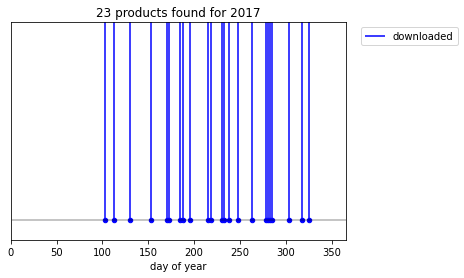

In [18]:
plt.title("%d products found for %s" % 
          (prodinfo['doy'].shape[0], ",".join(prodinfo['year'].drop_duplicates().tolist())))
plt.scatter(prodinfo['doy'].values, np.zeros(prodinfo.shape[0]), s=20, c='b')
#plt.scatter(uniform_doy_list, np.zeros(selected_doys.shape[0]), s=20, c='r')
plt.vlines(prodinfo['doy'].values, 0, 1, color='b', label='downloaded')
# plt.vlines(uniform_doy_list, 0, -1, color='r', label='uniform')
plt.hlines(0, 1, 365, color='k', alpha=0.3)
plt.ylim(-0.1, 1)
plt.xlim(0, 365)
plt.yticks([], [])
plt.xlabel('day of year')
plt.legend(bbox_to_anchor=(1.35, 1))

### Save downloaded products to disk

In [19]:
savename = '%s/downloaded_as_of_%s.csv' % \
           (products_dir, datetime.now().strftime('%Y%m%d_%H%M%S'))

if not os.path.exists(os.path.dirname(savename)):
    print("making new directory %s" % os.path.dirname(savename))
    os.makedirs(os.path.dirname(savename))

print("saving products info to %s" % savename)
prodinfo.to_csv(savename, index=False)

saving products info to /media/michaeltrs/0a8a5a48-ede5-47d0-8eff-10d11350bf98/Satellite_Data/Sentinel2/PSETAE_repl/2017/cloud_0_30/downloaded_as_of_20211117_170444.csv
